Imports

In [4]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

Comprar_figu(Comprar 1)

In [ ]:
def comprar_figu(figus_total): #Comprar una sola figu
    return random.randint(0,figus_total-1)

Generar paquetes(Np y Randint)

In [ ]:
#ConRandInt
def generar_paquete(_figus_total, _figus_paquete, ):
    figusPaquete = []
    for _ in range(0,_figus_paquete-1):
            figusPaquete.append(random.randint(0,_figus_total-1)) #Generar con Random
    return figusPaquete

In [56]:
#Con Numpy
def generar_paquete(_figus_total, _figus_paquete, _weights):
    return (np.random.choice(list(np.arange(0,_figus_total)), _figus_paquete,replace=False)).tolist() #Generar randoms ponerados con np' replace=False para evitar repes y p=weights para distintas probabilidades
        #Le saco el param p=_weights porque al ser las weights random complica mucho el llenado, aumentando el runtime significativamente

Chequear si esta lleno(Suma de todos los true(1) = cantidad de figus * la cantidad de coleccionistas)

In [18]:
def esta_lleno(_album):
    albumShape = _album.shape
    return np.sum(_album)//(albumShape[0]*albumShape[1])

Generate Random Weights

In [ ]:
def generateRandomWeights(_tamaño):
    weights = np.random.random(_tamaño)
    weights /= weights.sum()
    return weights

Cantor Pairing Function para pairear ints

In [16]:
def cantorFunction(x1,x2): #La encontre en google y es para relacionar dos ints, mas rapido que iterar por todos los tuples
    return (((x1+x2)*(x1+x2+1))/2)+x2

Funciones Principales

In [62]:
def cuantas_figus(_figus_total,_figusxPaquete,_cantColeccionistas,_figusWeights):
    figusAdquiridas = []
    album = np.full(
                    shape=(_figus_total,_cantColeccionistas),
                    fill_value=0,
                    dtype=int
                    )
    repes={}
    for coleccionista in range(0,_cantColeccionistas): #Creamos para guardar coleccionistas
        repes[coleccionista] = []   
    contPaquetes = 0

    faltantes = [set(np.arange(0,_figus_total).flatten()) for _ in range(_cantColeccionistas)]
    
    while not esta_lleno(album):
        yaProcesados=set() #Lo utilizamos para evitar operar sobre los mismos dos coleccionistas mas de una vez
        for coleccionista in range (0,_cantColeccionistas): #Iteramos sobre todos los coleccionistas para chequear todos con todos
            coleccionistas = np.arange(0,_cantColeccionistas)
            coleccionistas = np.delete(coleccionistas, np.where(coleccionistas==coleccionista))
            while(len(coleccionistas) != 0):#Logica de intercambiado de figus
                coleccionistaSeleccionado = coleccionistas[random.randint(0,len(coleccionistas)-1)] #Seleccionamos un coleccionista random y lo borramos de la lista
                coleccionistasPaired = cantorFunction(coleccionista,coleccionistaSeleccionado)
                if not coleccionistasPaired in yaProcesados:
                    yaProcesados.add(coleccionistasPaired)
                    coleccionistas = np.delete(coleccionistas, np.where(coleccionistas==coleccionistaSeleccionado))
                    if len(repes[coleccionistaSeleccionado]) > 0 and len(repes[coleccionista]) > 0:
                        for figuRepeSeleccionado in repes[coleccionistaSeleccionado]: #iteramos sobre todas las repes del seleccionado
                            if figuRepeSeleccionado in faltantes[coleccionista]: 
                                for figuRepeColeccionista in repes[coleccionista]: #Nos fijamos si alguna repe del coleccionista le sirve al seleccionado
                                    if figuRepeColeccionista in faltantes[coleccionistaSeleccionado] and figuRepeColeccionista != figuRepeSeleccionado and figuRepeSeleccionado in faltantes[coleccionista]:
                                        album[figuRepeSeleccionado][coleccionista] = 1; album[figuRepeColeccionista][coleccionistaSeleccionado] = 1
                                        repes[coleccionistaSeleccionado].remove(figuRepeSeleccionado)
                                        repes[coleccionista].remove(figuRepeColeccionista)
                                        faltantes[coleccionistaSeleccionado].remove(figuRepeColeccionista) #Producir el intercambio, eliminar de repes, faltantes y hacer 1 el valor en album
                                        faltantes[coleccionista].remove(figuRepeSeleccionado)
                                
        for coleccionista in range (0,_cantColeccionistas):
            contPaquetes += 1
            for figu in generar_paquete(_figus_total,_figusxPaquete,_figusWeights):   
                if album[figu][coleccionista] == 0: 
                    album[figu][coleccionista] = 1
                    faltantes[coleccionista].remove(figu)
                    figusAdquiridas.append(figu)
                else:
                    repes[coleccionista].append(figu)
    return (contPaquetes,figusAdquiridas)

In [63]:
def promedio(tamaño,repeticiones,figusPaquete,cantColeccionistas):
    res = []
    figusTotales = []
    figuWeights = generateRandomWeights(tamaño)
    for _ in range(0,repeticiones):
        iteracion = cuantas_figus(tamaño,figusPaquete,cantColeccionistas,figuWeights)
        res.append(iteracion[0]); figusTotales += iteracion[1]
    prom = np.mean(res) #Obtener Promedio
    getDistrib(tamaño,figusTotales)
    print(f"La mediana es: {mediana(insertionSort(res))}")
    print(f"El promedio es: {prom}")
    return prom

Insertion Sort y Encontrar la mediana-Extra5

In [14]:
def insertionSort(arr):
    for i in range(1, len(arr)):
        p = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > p:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = p
    return arr

def mediana(arr):
    i = len(arr)//2
    if len(arr) %2 != 1:
        return arr[i]
    return (arr[i- 1] + arr[i]) / 2

Scipy get density distribution of figus

In [ ]:
def getDistrib(_figusTotales,_figusList):
    figusTotales = pd.Series(np.array(_figusList))
    pd.DataFrame(figusTotales).plot(kind="density",
                                      figsize=(10,10),
                                      xlim=(-1,_figusTotales+50));
    
    mayorDensidad = [0,0]
    for x in range(-1, _figusTotales,1):
        densityX = stats.uniform.pdf(x, loc=0, scale=_figusTotales)
        if densityX >= mayorDensidad[0]:
            mayorDensidad[0] = densityX
            mayorDensidad[1] = x
            
    print(f"La mayor Densidad fue: {mayorDensidad[0]} y fue en x={mayorDensidad[1]}")
        
    return

Inputs y usage

La mayor Densidad fue: 0.0014947683109118087 y fue en x=668
El promedio es: 910.5


910.5

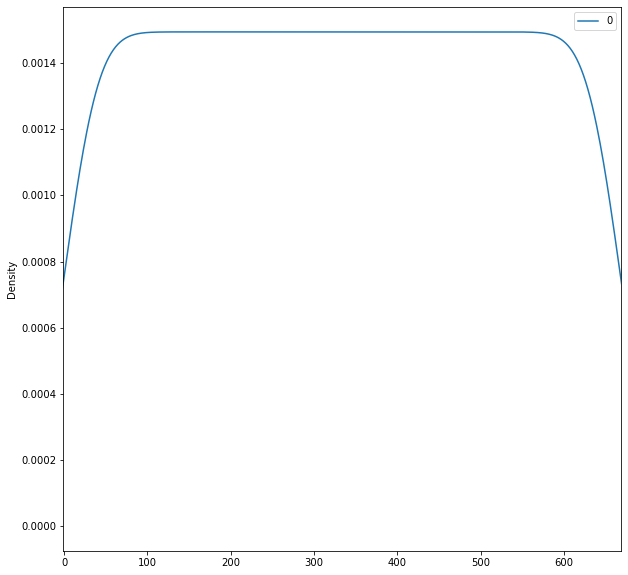

In [71]:
tamAlbum = int(input("Ingrese el tamaño del album: "))
rep = int(input("Ingrese el numero de repeticiones a promediar: "))
figXPaq = int(input("Ingrese el numero de figuritas por paquete: ")) #Inputs
cantCol = int(input("Ingrese la cantidad de collecionistas en el problema: "))

promedio(tamAlbum,rep,figXPaq,cantCol)

In [73]:
#Chequear prob de completar con N paquetes o menos
tamAlbum = int(input("Ingrese el tamaño del album: "))
rep = int(input("Ingrese el numero de repeticiones a promediar: "))
figXPaq = int(input("Ingrese el numero de figuritas por paquete: ")) #Inputs
cantCol = int(input("Ingrese la cantidad de collecionistas en el problema: "))
n = int(input("Que numero desea chequear? "))

def chequearProb(tamaño,repeticiones,figusPaquete,numAChequar,cantColeccionistas):
    contMenorANum= 0;
    weights = [(1/tamaño)]*tamaño
    for _ in range(0,repeticiones):
        if cuantas_figus(tamaño,figusPaquete,cantColeccionistas,weights)[0] <= numAChequar:
            contMenorANum+=1
    prob = (contMenorANum/repeticiones)
    print(f"Prob de completar con menos de {numAChequar} paquetes: {prob}")
    return prob

chequearProb(tamAlbum,rep,figXPaq,n,cantCol)

Prob de completar con menos de 850 paquetes: 0.34


0.34

Scipy get common distribution of figus

Linear regression to predict

In [ ]:
x = np.array([850, 1150, 900, 950, 1000, 1100]).reshape((-1, 1))
y = np.array([0.36, 0.85, 0.45, 0.56, 0.66, 0.86])
XTotal = (np.arange(0,2000)).reshape((-1, 1))

In [6]:
model = LinearRegression().fit(x, y)
Pred_Y = model.predict(XTotal)
print('predicted response:', Pred_Y, sep='\n')

predicted response:
[-1.11608696 -1.11433292 -1.11257888 ...  2.38672547  2.3884795
  2.39023354]


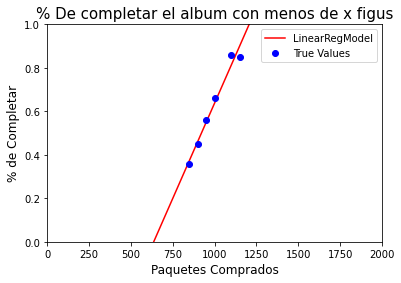

In [7]:

#Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('% De completar el album con menos de x figus', fontsize=15)   
ax.set_xlabel('Paquetes Comprados', fontsize=12)
ax.set_ylabel('% de Completar', fontsize=12)
ax.axis([0, 2000, 0, 1])
#Plot Model
XTotal = (np.arange(0,2000)); XTotal.reshape((-1, 1))
ax.plot(XTotal,Pred_Y,color='r', label='LinearRegModel')
ax.plot(x, y,'o', color="b", label='True Values')

plt.legend()
plt.show()